/tmp/ipython-input-1776462779.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start = start_date, end = end_date)['Close']
[*********************100%***********************]  10 of 10 completed


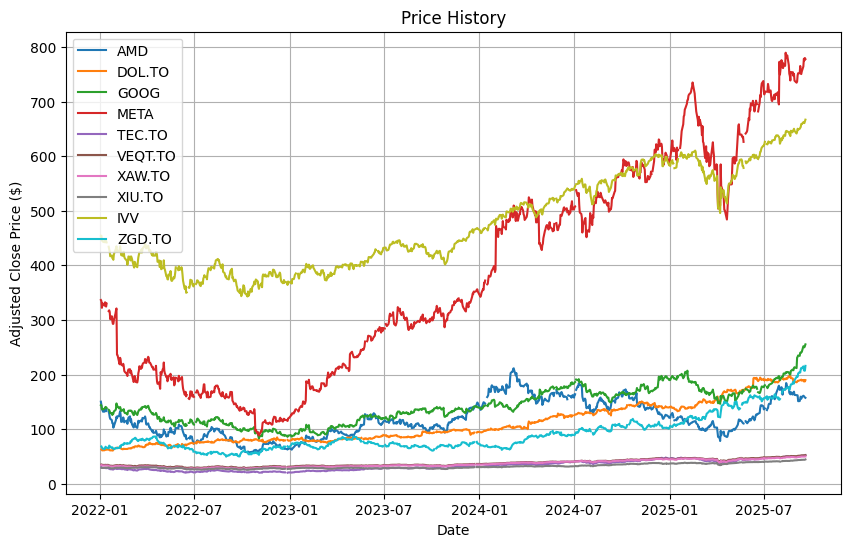

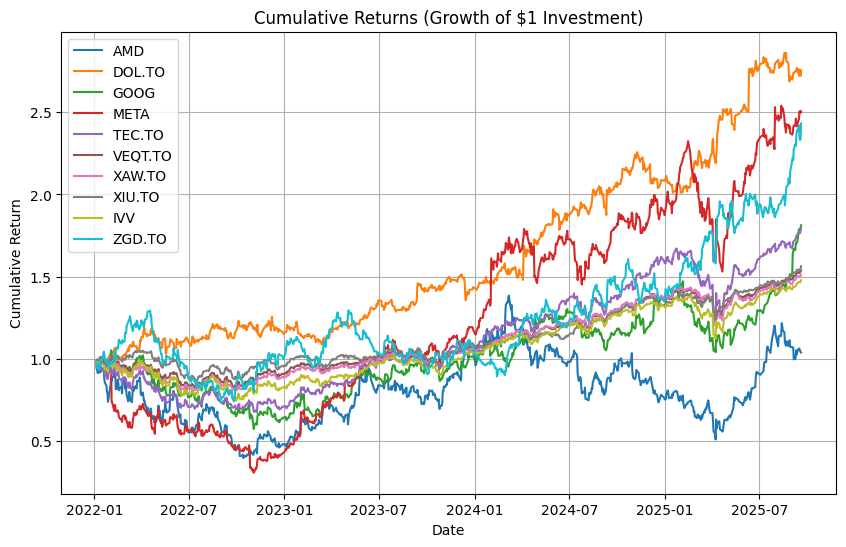

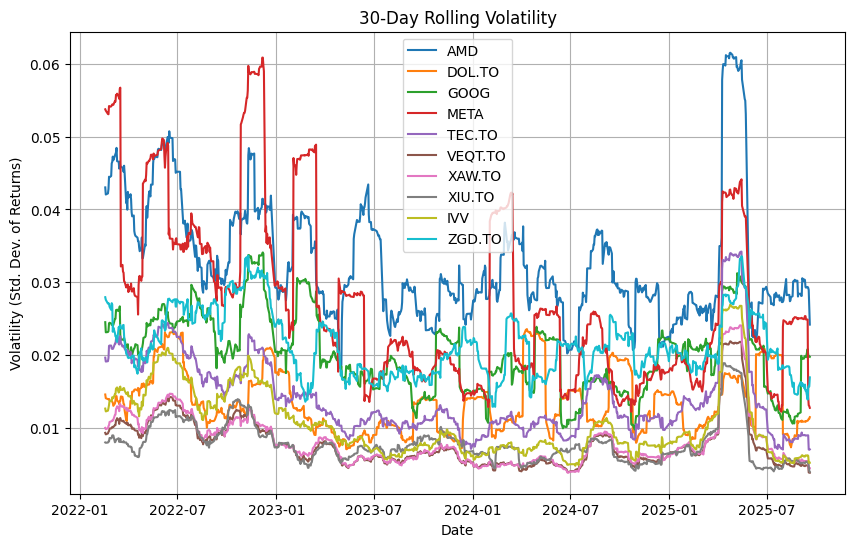


=== Summary Statistics ===
         Mean Return  Volatility  Sharpe Ratio (approx)
Ticker                                                 
AMD         0.000607    0.033734               0.018002
DOL.TO      0.001255    0.013968               0.089821
GOOG        0.000896    0.020848               0.042972
IVV         0.000512    0.011579               0.044261
META        0.001507    0.030137               0.050015
TEC.TO      0.000784    0.015215               0.051505
VEQT.TO     0.000527    0.008488               0.062048
XAW.TO      0.000510    0.008993               0.056684
XIU.TO      0.000544    0.008328               0.065367
ZGD.TO      0.001253    0.021875               0.057286


/tmp/ipython-input-1776462779.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(summary_stats["Volatility"][i], summary_stats["Mean Return"][i], ticker)


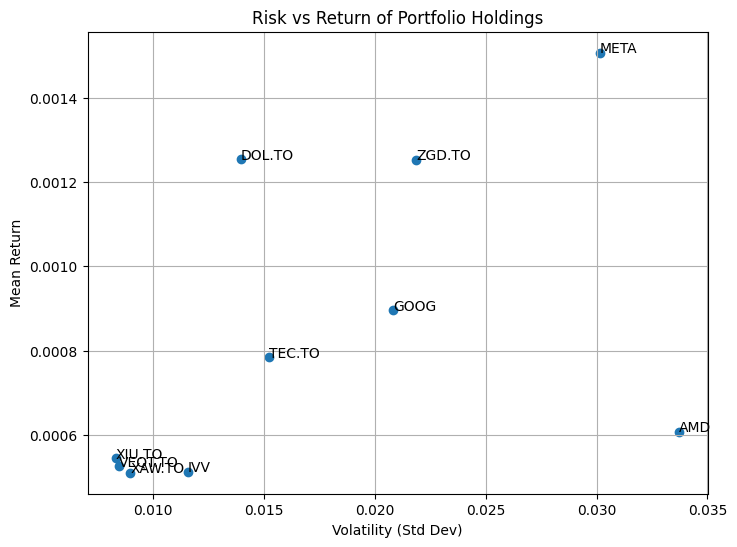

In [8]:
# In this project, I analyze my own TFSA holdings using Python. I compute returns, volatility, and risk-adjusted performance.
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
tickers = ['AMD', 'DOL.TO', 'GOOG', 'META', 'TEC.TO', 'VEQT.TO', 'XAW.TO', 'XIU.TO', 'IVV', 'ZGD.TO']
start_date = "2022-01-01"
end_date = "2025-09-22"

# Download historical adjusted close prices
data = yf.download(tickers, start = start_date, end = end_date)['Close']

# Calculate daily returns
returns = data.pct_change(fill_method=None).dropna()

# Cumulative returns
cumulative_returns = (1 + returns).cumprod()

# Rolling volatility (30-day)
rolling_volatility = returns.rolling(window=30).std()

# Price History
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)
plt.title("Price History")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price ($)")
plt.legend()
plt.grid(True)
plt.show()

# Cumulative returns
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)
plt.title("Cumulative Returns (Growth of $1 Investment)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

# Rolling volatility
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(rolling_volatility.index, rolling_volatility[ticker], label=ticker)
plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (Std. Dev. of Returns)")
plt.legend()
plt.grid(True)
plt.show()

# Summary Statistics
summary_stats = pd.DataFrame({
    "Mean Return": returns.mean(),
    "Volatility": returns.std(),
    "Sharpe Ratio (approx)": returns.mean() / returns.std()
})

print("\n=== Summary Statistics ===")
print(summary_stats)

# Risk vs Return
plt.figure(figsize=(8,6))
plt.scatter(summary_stats["Volatility"], summary_stats["Mean Return"])
for i, ticker in enumerate(summary_stats.index):
    plt.text(summary_stats["Volatility"][i], summary_stats["Mean Return"][i], ticker)
plt.xlabel("Volatility (Std Dev)")
plt.ylabel("Mean Return")
plt.title("Risk vs Return of Portfolio Holdings")
plt.grid(True)
plt.show()
